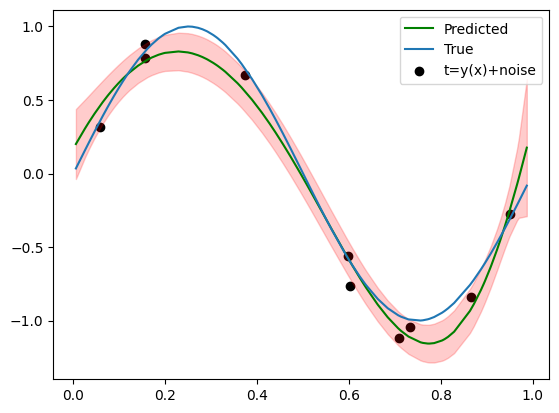

In [49]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# random seed
SEED = np.random.RandomState(42)

# Define constants
M = 9
b = 11.1
a = .005
N = 10

x_train = np.sort(SEED.uniform(size=N))
y_train = np.sin(2*np.pi*x_train)
n = SEED.normal(loc=0.0, scale=1/b, size=N)
t = y_train + n

def phi_func(x):
    # calculate phi
    phi = []
    for n in range(len(x)):
        row = []
        for m in range(M+1):
            row.append(x[n] ** m)
        phi.append(row)

    phi = np.asarray(phi)
    
    return phi

phi = phi_func(x_train)


sum_phi_n = np.zeros((M+1, M+1))
sum_phi_n_t = np.zeros((M+1, 1))
for n in range(N):
    phi_n = []
    for m in range(M+1):
        phi_n.append(x_train[n] ** m)
        
    phi_n = np.asarray(phi_n).reshape(-1,1)
    
    temp = np.dot(phi_n, phi_n.T)
    sum_phi_n = sum_phi_n + temp
    
    temp = np.dot(phi_n, t[n])
    
    sum_phi_n_t = sum_phi_n_t + temp
    
# Calculate S
S = np.linalg.inv(0.005 * np.identity(M+1) + 11.1 * sum_phi_n)

# Generate test data
x_test = np.sort(SEED.uniform(low=0.0, high=1.0, size=100))
phi_test = phi_func(x_test)
m = b*np.dot(phi_test, np.dot(S, sum_phi_n_t))
s = 1/b + np.diag(np.dot(np.dot(phi_test, S), phi_test.T))
s = s.reshape(-1,1)
y_test = np.sin(2*np.pi*x_test) 

fig, ax = plt.subplots()
ax.plot(x_test, m, '-', color='green', label='Predicted')
ax.plot(x_test, y_test, '-', label='True')
ax.scatter(x_train, t, label='t=y(x)+noise', color='black')
ax.fill_between(x_test.reshape(-1,), (m - abs(s)).reshape(-1,), (m+abs(s)).reshape(-1,), 
                alpha=0.2, color='r')
plt.legend()
plt.show()

We observe that the preditive model could not fit very well the underlying function (`sin(x)`). That's because of the small training dataset (N=10 points). 
However, if we increase the the training samples, the predictive model will fit better the underlying function.